In [133]:
## Importando bibliotecas 
import pandas as pd
import random
import fastavro
import time
import os
import json


import findspark
from pyspark.sql.types import StructType

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ExemploAvro") \
    .config('spark.jars.packages', 'org.apache.spark:spark:spark-avro_2.12:3.2.0').getOrCreate()


In [134]:
## Gerando um dataframe aleatório pra gerar arquivos em csv, json e avro

# Valores possíveis por coluna
nomes = ["Pedro", "Tiago", "João", "André", "Filipe", "Judas Iscariotes", "Mateus", "Tomé", "Bartolomeu", "Judas Tadeu", "Simão"]
idades = [20, 23, 19, 30, 28, 25, 31, 36, 34, 27, 39, 41, 52]
cores_favoritas = ["Vermelho", "Azul", "Verde", "Amarelo", "Roxo", "Laranja", "Anil"] 
animais_favoritos = ["Cachorro", "Gato", "Pássaro", "Peixe", "Coelho", "Bode", "Dragão de Komodo"]  # Adicione mais valores, se desejar
times_que_torce = ["Flamengo", "Corinthians", "Palmeiras", "São Paulo", "Grêmio", "Vasco", "Belo", "Campinense", "Treze"]  # Adicione mais valores, se desejar
estados_que_nasceu = ["Paraíba", "Acre", "São Paulo", "Rio de Janeiro", "Minas Gerais", "Bahia", "Pernambuco"]  # Adicione mais valores, se desejar

# Criando uma lista de dicionários com valores aleatórios usando random
dados_aleatorios = []
for i in range(1000):
    dados_aleatorios.append({
        "nome": random.choice(nomes),
        "idade": random.choice(idades),
        "numero_favorito": random.randint(0, 1000),
        "cor_favorita": random.choice(cores_favoritas),
        "animal_favorito": random.choice(animais_favoritos),
        "time_que_torce": random.choice(times_que_torce),
        "estado_que_nasceu": random.choice(estados_que_nasceu)
    })

df = pd.DataFrame(dados_aleatorios)

In [135]:
# Definindo o esquema Avro
# obs: Lembrar de colocar null pra não ter problema com celulas vazias de uma base baixda da internet
schema = {
    "type": "record",
    "name": "ExemploAvro",
    "fields": [
        {"name": "nome", "type": "string"},
        {"name": "idade", "type": ["int", "null"]},
        {"name": "numero_favorito", "type": ["int", "null"]},
        {"name": "cor_favorita", "type": ["string", "null"]},
        {"name": "animal_favorito", "type": ["string", "null"]},
        {"name": "time_que_torce", "type": ["string", "null"]},
        {"name": "estado_que_nasceu", "type": ["string", "null"]}
    ]
}

In [136]:
start_time_csv_write = time.time()
df.to_csv("dados.csv", index=False)
csv_write_time = time.time() - start_time_csv_write

start_time_json_write = time.time()
# Salvar o DataFrame em um arquivo JSON
df.to_json('dados.json', orient='records', lines=True)
json_write_time = time.time() - start_time_json_write

start_time_avro_write = time.time()
with open("dados.avro", "wb") as avro_file:
    fastavro.writer(avro_file, schema, df.to_dict(orient="records"))
avro_write_time = time.time() - start_time_avro_write


In [139]:
import findspark
from pyspark.sql.types import StructType

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ExemploAvro") \
    .config('spark.jars.packages', 'org.apache.spark:spark:spark-avro_2.12:3.2.0').getOrCreate()

# Medindo o tempo de leitura em CSV
start_time_csv_read = time.time()
df_csv = pd.read_csv("dados.csv")
csv_read_time = time.time() - start_time_csv_read

# Medindo o tempo de leitura em Avro
start_time_avro_read = time.time()
df_avro = spark.read.format("avro").load("dados.avro")
avro_read_time = time.time() - start_time_avro_read

# Ler dados do arquivo JSON e medir o tempo
start_time_json = time.time()
df = pd.read_json("dados.json", lines=True)
json_read_time = time.time() - start_time_json

print(f"Tempo para ler JSON: {json_read_time:.4f} segundos")
print(f"Tempo de leitura em CSV: {csv_read_time:.4f} segundos")
print(f"Tempo de leitura em Avro: {avro_read_time:.4f} segundos")

Tempo para ler JSON: 0.0156 segundos
Tempo de leitura em CSV: 0.0047 segundos
Tempo de leitura em Avro: 0.0551 segundos


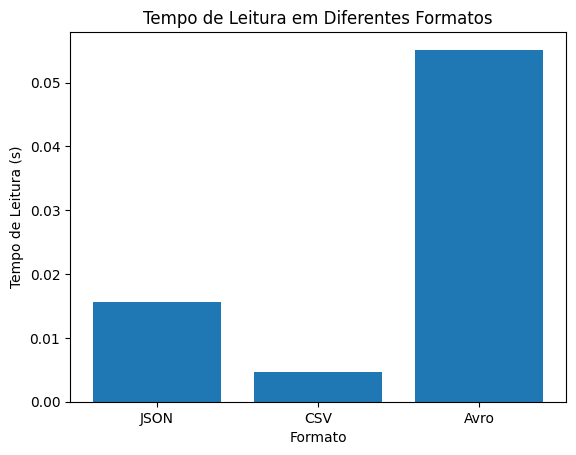

In [141]:
import matplotlib.pyplot as plt
# Criar um gráfico de barras
tempos = [json_read_time, csv_read_time, avro_read_time]
formatos = ["JSON", "CSV", "Avro"]

plt.bar(formatos, tempos)
plt.xlabel("Formato")
plt.ylabel("Tempo de Leitura (s)")
plt.title("Tempo de Leitura em Diferentes Formatos")
plt.show()


Tempo de leitura em CSV (1000 linhas): 0.0095 segundos
Tempo de leitura em Avro (1000 linhas): 0.0263 segundos
Tempo de leitura em JSON (1000 linhas): 0.0170 segundos


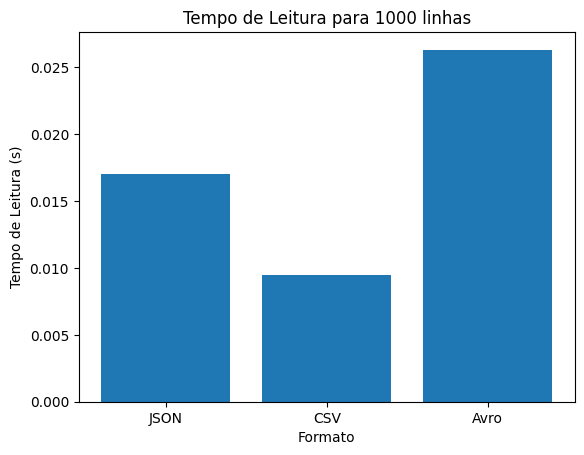


Tempo de leitura em CSV (10000 linhas): 0.0170 segundos
Tempo de leitura em Avro (10000 linhas): 0.0261 segundos
Tempo de leitura em JSON (10000 linhas): 0.0537 segundos


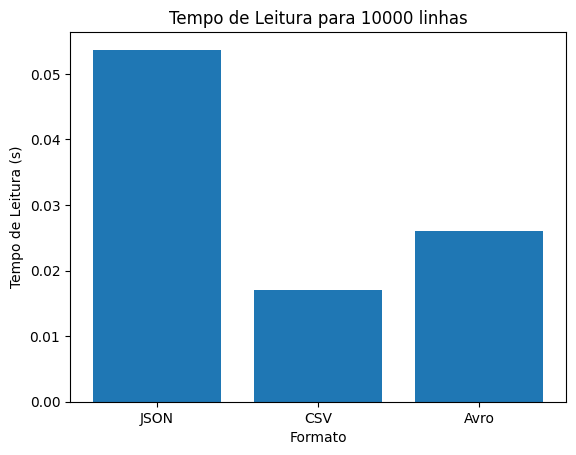


Tempo de leitura em CSV (100000 linhas): 0.0968 segundos
Tempo de leitura em Avro (100000 linhas): 0.0207 segundos
Tempo de leitura em JSON (100000 linhas): 0.5141 segundos


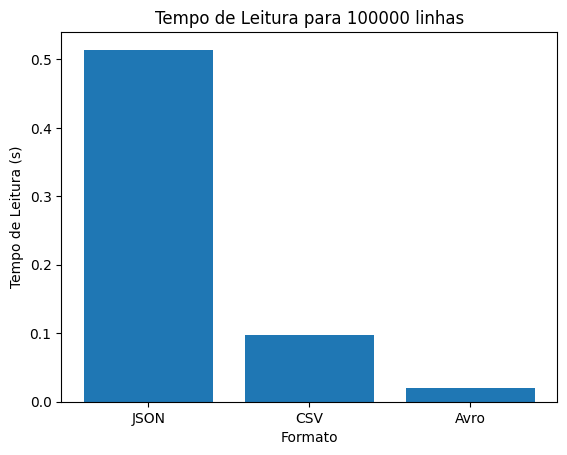


Tempo de leitura em CSV (1000000 linhas): 0.8493 segundos
Tempo de leitura em Avro (1000000 linhas): 0.0223 segundos
Tempo de leitura em JSON (1000000 linhas): 7.0906 segundos


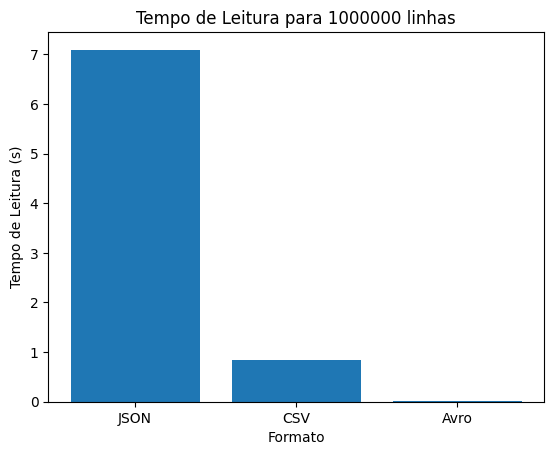

In [148]:
import pandas as pd
import random
import fastavro
import time
import os
import json
import findspark
from pyspark.sql import SparkSession

findspark.init()

spark = SparkSession.builder \
    .appName("ExemploAvro") \
    .config('spark.jars.packages', 'org.apache.spark:spark-avro_2.12:3.2.0').getOrCreate()

# Função para gerar dados aleatórios com um número especificado de linhas
def gerar_dados_aleatorios(num_linhas):
    nomes = ["Pedro", "Tiago", "João", "André", "Filipe", "Judas Iscariotes", "Mateus", "Tomé", "Bartolomeu", "Judas Tadeu", "Simão"]
    idades = [20, 23, 19, 30, 28, 25, 31, 36, 34, 27, 39, 41, 52]
    cores_favoritas = ["Vermelho", "Azul", "Verde", "Amarelo", "Roxo", "Laranja", "Anil"] 
    animais_favoritos = ["Cachorro", "Gato", "Pássaro", "Peixe", "Coelho", "Bode", "Dragão de Komodo"]
    times_que_torce = ["Flamengo", "Corinthians", "Palmeiras", "São Paulo", "Grêmio", "Vasco", "Belo", "Campinense", "Treze"]
    estados_que_nasceu = ["Paraíba", "Acre", "São Paulo", "Rio de Janeiro", "Minas Gerais", "Bahia", "Pernambuco"]

    dados_aleatorios = []
    for i in range(num_linhas):
        dados_aleatorios.append({
            "nome": random.choice(nomes),
            "idade": random.choice(idades),
            "numero_favorito": random.randint(0, 1000),
            "cor_favorita": random.choice(cores_favoritas),
            "animal_favorito": random.choice(animais_favoritos),
            "time_que_torce": random.choice(times_que_torce),
            "estado_que_nasceu": random.choice(estados_que_nasceu)
        })

    return pd.DataFrame(dados_aleatorios)

# Lista de números de linhas para os cenários
num_linhas_cenarios = [1000, 10000, 100000, 1000000]

for num_linhas in num_linhas_cenarios:
    df = gerar_dados_aleatorios(num_linhas)

    start_time_csv_write = time.time()
    df.to_csv(f"dados_{num_linhas}.csv", index=False)
    csv_write_time = time.time() - start_time_csv_write

    start_time_json_write = time.time()
    df.to_json(f'dados_{num_linhas}.json', orient='records', lines=True)
    json_write_time = time.time() - start_time_json_write

    start_time_avro_write = time.time()
    with open(f"dados_{num_linhas}.avro", "wb") as avro_file:
        fastavro.writer(avro_file, schema, df.to_dict(orient="records"))
    avro_write_time = time.time() - start_time_avro_write

    # Medindo o tempo de leitura em CSV
    start_time_csv_read = time.time()
    df_csv = pd.read_csv(f"dados_{num_linhas}.csv")
    csv_read_time = time.time() - start_time_csv_read

    # Medindo o tempo de leitura em Avro
    start_time_avro_read = time.time()
    df_avro = spark.read.format("avro").load(f"dados_{num_linhas}.avro")
    avro_read_time = time.time() - start_time_avro_read

    # Ler dados do arquivo JSON e medir o tempo
    start_time_json_read = time.time()
    df = pd.read_json(f"dados_{num_linhas}.json", lines=True)
    json_read_time = time.time() - start_time_json_read

    print(f"Tempo de leitura em CSV ({num_linhas} linhas): {csv_read_time:.4f} segundos")
    print(f"Tempo de leitura em Avro ({num_linhas} linhas): {avro_read_time:.4f} segundos")
    print(f"Tempo de leitura em JSON ({num_linhas} linhas): {json_read_time:.4f} segundos")
    
    tempos = [json_read_time, csv_read_time, avro_read_time]
    formatos = ["JSON", "CSV", "Avro"]

    plt.bar(formatos, tempos)
    plt.xlabel("Formato")
    plt.ylabel("Tempo de Leitura (s)")
    plt.title(f"Tempo de Leitura para {num_linhas} linhas")
    plt.show()

    print()


Tempo de leitura em CSV (1000 linhas): 0.0228 segundos
Tempo de leitura em Avro (1000 linhas): 0.0260 segundos
Tempo de leitura em JSON (1000 linhas): 0.0158 segundos


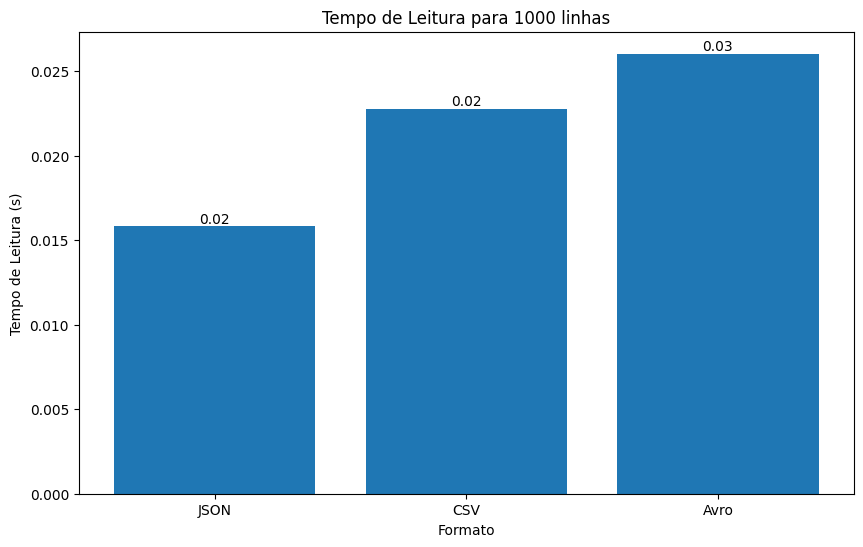


Tempo de leitura em CSV (10000 linhas): 0.0178 segundos
Tempo de leitura em Avro (10000 linhas): 0.0161 segundos
Tempo de leitura em JSON (10000 linhas): 0.0620 segundos


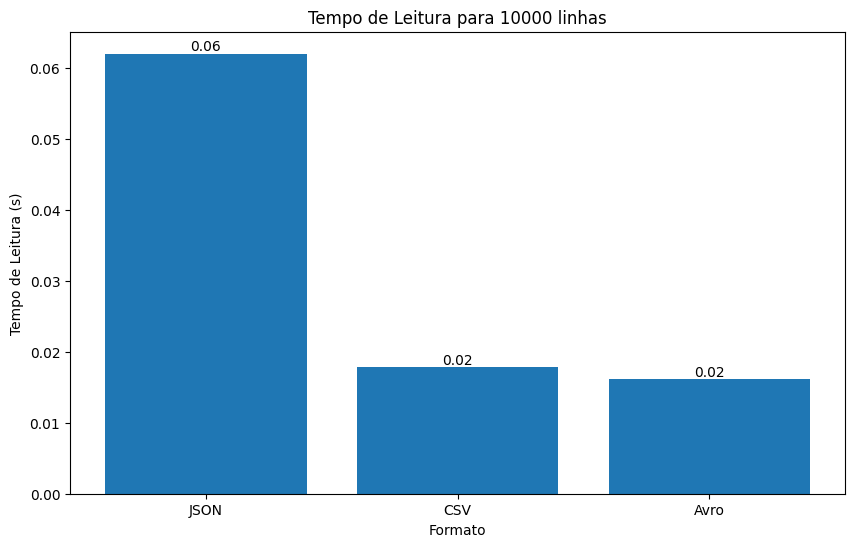


Tempo de leitura em CSV (100000 linhas): 0.0969 segundos
Tempo de leitura em Avro (100000 linhas): 0.0173 segundos
Tempo de leitura em JSON (100000 linhas): 0.5025 segundos


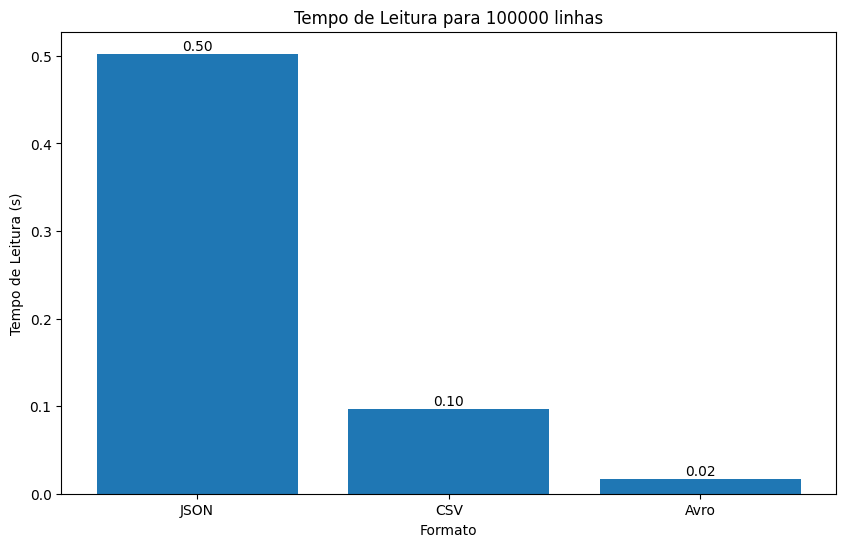


Tempo de leitura em CSV (1000000 linhas): 0.7982 segundos
Tempo de leitura em Avro (1000000 linhas): 0.0297 segundos
Tempo de leitura em JSON (1000000 linhas): 5.5098 segundos


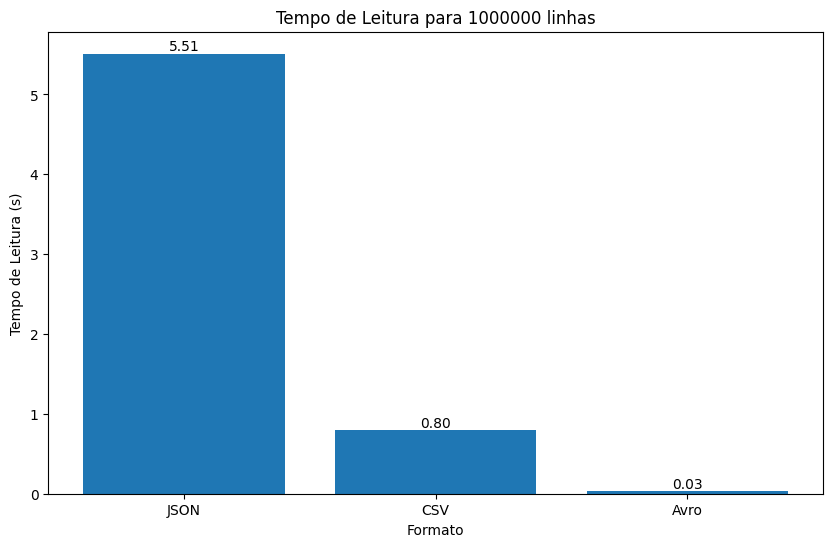

In [155]:
import pandas as pd
import random
import fastavro
import time
import os
import json
import findspark
from pyspark.sql import SparkSession

findspark.init()

spark = SparkSession.builder \
    .appName("ExemploAvro") \
    .config('spark.jars.packages', 'org.apache.spark:spark-avro_2.12:3.2.0').getOrCreate()

# Função para gerar dados aleatórios com um número especificado de linhas
def gerar_dados_aleatorios(num_linhas):
    nomes = ["Pedro", "Tiago", "João", "André", "Filipe", "Judas Iscariotes", "Mateus", "Tomé", "Bartolomeu", "Judas Tadeu", "Simão"]
    idades = [20, 23, 19, 30, 28, 25, 31, 36, 34, 27, 39, 41, 52]
    cores_favoritas = ["Vermelho", "Azul", "Verde", "Amarelo", "Roxo", "Laranja", "Anil"] 
    animais_favoritos = ["Cachorro", "Gato", "Pássaro", "Peixe", "Coelho", "Bode", "Dragão de Komodo"]
    times_que_torce = ["Flamengo", "Corinthians", "Palmeiras", "São Paulo", "Grêmio", "Vasco", "Belo", "Campinense", "Treze"]
    estados_que_nasceu = ["Paraíba", "Acre", "São Paulo", "Rio de Janeiro", "Minas Gerais", "Bahia", "Pernambuco"]

    dados_aleatorios = []
    for i in range(num_linhas):
        dados_aleatorios.append({
            "nome": random.choice(nomes),
            "idade": random.choice(idades),
            "numero_favorito": random.randint(0, 1000),
            "cor_favorita": random.choice(cores_favoritas),
            "animal_favorito": random.choice(animais_favoritos),
            "time_que_torce": random.choice(times_que_torce),
            "estado_que_nasceu": random.choice(estados_que_nasceu)
        })

    return pd.DataFrame(dados_aleatorios)

# Lista de números de linhas para os cenários
num_linhas_cenarios = [1000, 10000, 100000, 1000000]

for num_linhas in num_linhas_cenarios:
    df = gerar_dados_aleatorios(num_linhas)

    start_time_csv_write = time.time()
    df.to_csv(f"dados_{num_linhas}.csv", index=False)
    csv_write_time = time.time() - start_time_csv_write

    start_time_json_write = time.time()
    df.to_json(f'dados_{num_linhas}.json', orient='records', lines=True)
    json_write_time = time.time() - start_time_json_write

    start_time_avro_write = time.time()
    with open(f"dados_{num_linhas}.avro", "wb") as avro_file:
        fastavro.writer(avro_file, schema, df.to_dict(orient="records"))
    avro_write_time = time.time() - start_time_avro_write

    # Medindo o tempo de leitura em CSV
    start_time_csv_read = time.time()
    df_csv = pd.read_csv(f"dados_{num_linhas}.csv")
    csv_read_time = time.time() - start_time_csv_read

    # Medindo o tempo de leitura em Avro
    start_time_avro_read = time.time()
    df_avro = spark.read.format("avro").load(f"dados_{num_linhas}.avro")
    avro_read_time = time.time() - start_time_avro_read

    # Ler dados do arquivo JSON e medir o tempo
    start_time_json_read = time.time()
    df = pd.read_json(f"dados_{num_linhas}.json", lines=True)
    json_read_time = time.time() - start_time_json_read

    print(f"Tempo de leitura em CSV ({num_linhas} linhas): {csv_read_time:.4f} segundos")
    print(f"Tempo de leitura em Avro ({num_linhas} linhas): {avro_read_time:.4f} segundos")
    print(f"Tempo de leitura em JSON ({num_linhas} linhas): {json_read_time:.4f} segundos")
    
    tempos = [json_read_time, csv_read_time, avro_read_time]
    formatos = ["JSON", "CSV", "Avro"]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(formatos, tempos)
    plt.xlabel("Formato")
    plt.ylabel("Tempo de Leitura (s)")
    plt.title(f"Tempo de Leitura para {num_linhas} linhas")

    # Adicionar rótulos de dados nas barras do gráfico
    for bar, tempo in zip(bars, tempos):
        plt.text(bar.get_x() + bar.get_width() / 2, tempo, f"{tempo:.2f}", ha='center', va='bottom')

    plt.show()
    print()